# Health Detector: Using scikit-learn

### 1. Imports

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [186]:
def prettyPrint(array):
    print(f"Model: \t\t\t\t{array[0]}\nR2 Score: \t\t\t{array[1]}\nCV R2 Score(Full Data): \t{array[2]}\nCV R2 Score(CV Data): \t\t{array[3]}")

# 1. Linear Regression

In [187]:
main_data = pd.read_csv("./data/activity.csv")

In [188]:
main_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [189]:
print(main_data.dtypes)

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


#### Observations
1. We observe that the `ActivityDate` column has no effect on the final result, since the weather conditions are not given. In real life, the data may have been important if the weather conditions were given. Hence we are dropping the column from the data. Same for `Id`

In [190]:
data = main_data.drop(columns=["Id", "ActivityDate"])
data.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [191]:
randomState = 42

def splitData(randomState, data):

    train_cv_data, test_data = train_test_split(data, test_size=0.2, random_state=randomState)
    train_data, cv_data = train_test_split(train_cv_data, test_size=0.25, random_state=randomState)  

    print(f"Train shape: {train_data.shape}")
    print(f"CV shape: {cv_data.shape}")
    print(f"Test shape: {test_data.shape}")

    X_raw = data.drop(columns=["Calories"])
    y_raw = data["Calories"]

    X_train = train_data.drop(columns=["Calories"])
    y_train = train_data["Calories"]

    X_cv = cv_data.drop(columns=["Calories"])
    y_cv = cv_data["Calories"]

    X_test = test_data.drop(columns=["Calories"])
    y_test = test_data["Calories"]
    return [X_raw, y_raw, X_train, y_train, X_cv, y_cv, X_test, y_test]



## No-Optimisation Result

In [213]:
# Non-Scaled Data
unscaled_data_array = splitData(randomState=randomState, data=data)

Train shape: (273, 13)
CV shape: (92, 13)
Test shape: (92, 13)


In [193]:
def unregLR(X_raw, y_raw, X_train, y_train, X_cv, y_cv, X_test, y_test):
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)

    y_pred = linear_regression.predict(X_test)
    # print("Linear Regression")
    # print("R² Score:", r2_score(y_test, y_pred))
    # print("MSE:", mean_squared_error(y_test, y_pred))

    cv_scores_full = cross_val_score(linear_regression, X_raw, y_raw, cv=5, scoring='r2')
    cv_scores_cv = cross_val_score(linear_regression, X_cv, y_cv, cv=5, scoring='r2')
    # print("Cross`-validated R²:", cv_scores.mean())
    return [linear_regression, r2_score(y_test, y_pred), cv_scores_full.mean(), cv_scores_cv.mean()]

In [214]:
prettyPrint(unregLR(*unscaled_data_array))

Model: 				LinearRegression()
R2 Score: 			0.7433511680465354
CV R2 Score(Full Data): 	-0.6600870916930928
CV R2 Score(CV Data): 		0.49721843755187195


## Obeservations and Conclusions on the "Raw" output:
1. The R2 score we obtained is 0.77. While this score is not too bad, some tuning could possibly improve it.
2. The Cross validation R2 score, however tells an entirely different story. The negative score implies that the model does worse than just outputting the mean value for each value.
3. We must introduce several factors to improve performance.

In [215]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
# print(scaled_data.head())

scaled_data_array = splitData(randomState=randomState, data=scaled_data)

Train shape: (273, 13)
CV shape: (92, 13)
Test shape: (92, 13)


In [216]:
prettyPrint(unregLR(*scaled_data_array))

Model: 				LinearRegression()
R2 Score: 			0.7433511680465386
CV R2 Score(Full Data): 	-0.6600870916929907
CV R2 Score(CV Data): 		0.49721843755188894


As we can see te scaling did not affect the Linear regression at all due to absence of regularisation

# Ridge

In [208]:
def ridgeRegression(alpha: float, X_raw, y_raw, X_train, y_train, X_cv, y_cv, X_test, y_test):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    # print("Linear Regression regularised with Ridge Regularisation")
    # print("R² Score:", r2)
    # print("MSE:", mean_squared_error(y_test, y_pred))

    cv_scores_full = cross_val_score(ridge, X_raw, y_raw, cv=5, scoring='r2')
    cv_scores_cv = cross_val_score(ridge, X_cv, y_cv, cv=5, scoring='r2')
    mean_cv_r2_full = cv_scores_full.mean()
    mean_cv_r2_cv = cv_scores_cv.mean()
    # print("Cross-validated R²:", mean_cv_r2)

    return [ridge, r2, mean_cv_r2_full, mean_cv_r2_cv]


In [218]:
prettyPrint(ridgeRegression(1, *scaled_data_array))

Model: 				Ridge(alpha=1)
R2 Score: 			0.738512930543872
CV R2 Score(Full Data): 	0.19901365271105126
CV R2 Score(CV Data): 		0.11160468239910819


In [219]:
prettyPrint(ridgeRegression(1, *unscaled_data_array))

Model: 				Ridge(alpha=1)
R2 Score: 			0.7472947561719497
CV R2 Score(Full Data): 	0.4116566608216374
CV R2 Score(CV Data): 		0.5045994482044904


In [220]:
ridge, _, _, _ = ridgeRegression(0.027, *scaled_data_array)


# Lasso

In [221]:
def lassoRegression(alpha: float, X_raw, y_raw, X_train, y_train, X_cv, y_cv, X_test, y_test):
    lasso = Ridge(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    # print("Linear Regression regularised with Ridge Regularisation")
    # print("R² Score:", r2)
    # print("MSE:", mean_squared_error(y_test, y_pred))

    cv_scores_full = cross_val_score(lasso, X_raw, y_raw, cv=5, scoring='r2')
    cv_scores_cv = cross_val_score(lasso, X_cv, y_cv, cv=5, scoring='r2')
    mean_cv_r2_full = cv_scores_full.mean()
    mean_cv_r2_cv = cv_scores_cv.mean()
    # print("Cross-validated R²:", mean_cv_r2)

    return [lasso, r2, mean_cv_r2_full, mean_cv_r2_cv]

In [222]:
prettyPrint(lassoRegression(1, *scaled_data_array))

Model: 				Ridge(alpha=1)
R2 Score: 			0.738512930543872
CV R2 Score(Full Data): 	0.19901365271105126
CV R2 Score(CV Data): 		0.11160468239910819


First, tune Ridge lambda

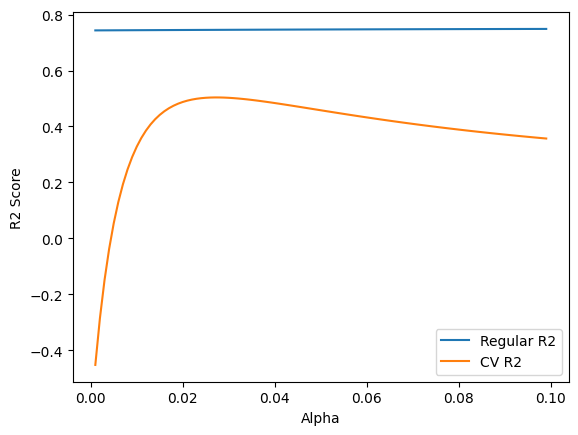

0.099 0.7487046357618605 0.3567819433947944
0.027 0.7453447716524794 0.5037055325847376


In [224]:
alphas = []
r2_scores = []
cv_r2_scores = []
maxr2i = 0
maxcvr2i = 0
for i in range(1, 100):
    alpha = i / 1000
    alphas.append(alpha)
    _, R2, cvR2, _  = ridgeRegression(alpha, *scaled_data_array)
    r2_scores.append(R2)
    cv_r2_scores.append(cvR2)
    if(R2 > r2_scores[maxr2i]):
        maxr2i = i - 1
    if(cvR2 > cv_r2_scores[maxcvr2i]):
        maxcvr2i = i - 1

plt.plot(alphas, r2_scores, label="Regular R2")
plt.plot(alphas, cv_r2_scores, label="CV R2")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.show()
print(alphas[maxr2i], r2_scores[maxr2i], cv_r2_scores[maxr2i])
print(alphas[maxcvr2i], r2_scores[maxcvr2i], cv_r2_scores[maxcvr2i])

/home/anshumaan/Development/college/health-predictor/health-predictor-venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.974e-02, tolerance: 2.773e-02
  model = cd_fast.enet_coordinate_descent(
/home/anshumaan/Development/college/health-predictor/health-predictor-venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.420e-01, tolerance: 3.604e-02
  model = cd_fast.enet_coordinate_descent(
/home/anshumaan/Development/college/health-predictor/health-predictor-venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: O

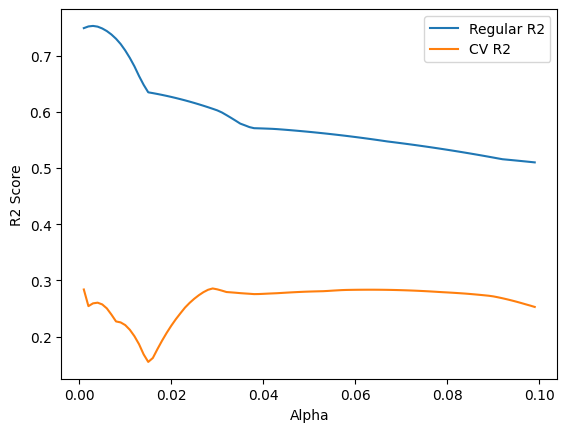

0.003 0.7528591278344018 0.25921168846497794
0.029 0.6054305190825049 0.2856900155415311


In [203]:
alphas = []
r2_scores = []
cv_r2_scores = []
maxr2i = 0
maxcvr2i = 0
for i in range(1, 100):
    alpha = i / 1000
    alphas.append(alpha)
    R2, cvR2 = lassoRegression(alpha)
    r2_scores.append(R2)
    cv_r2_scores.append(cvR2)
    if(R2 > r2_scores[maxr2i]):
        maxr2i = i - 1
    if(cvR2 > cv_r2_scores[maxcvr2i]):
        maxcvr2i = i - 1

plt.plot(alphas, r2_scores, label="Regular R2")
plt.plot(alphas, cv_r2_scores, label="CV R2")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.show()
print(alphas[maxr2i], r2_scores[maxr2i], cv_r2_scores[maxr2i])
print(alphas[maxcvr2i], r2_scores[maxcvr2i], cv_r2_scores[maxcvr2i])

Both point towards overfitting.
Now I will attempt to remove some columns

In [204]:
scaled_data.dtypes

TotalSteps                  float64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes           float64
FairlyActiveMinutes         float64
LightlyActiveMinutes        float64
SedentaryMinutes            float64
Calories                    float64
dtype: object

In [205]:
scaled_data.describe()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,4.570000e+02,4.570000e+02,457.000000,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,457.000000,4.570000e+02
mean,-6.219192e-17,1.554798e-17,-7.773991e-17,0.000000,1.243838e-16,3.886995e-17,-3.109596e-17,4.664394e-17,7.773991e-17,-2.137847e-17,-1.943498e-18,0.000000,2.487677e-16
std,1.001096e+00,1.001096e+00,1.001096e+00,1.001096,1.001096e+00,1.001096e+00,1.001096e+00,1.001096e+00,1.001096e+00,1.001096e+00,1.001096e+00,1.001096,1.001096e+00
min,-1.213994e+00,-1.143692e+00,-1.134289e+00,-0.211514,-4.753180e-01,-5.766193e-01,-1.293110e+00,-2.245612e-01,-5.754502e-01,-3.613598e-01,-1.393199e+00,-2.861355,-2.687791e+00
25%,-8.453392e-01,-7.979007e-01,-8.193347e-01,-0.211514,-4.753180e-01,-5.766193e-01,-9.038613e-01,-2.245612e-01,-5.754502e-01,-3.613598e-01,-8.689165e-01,-0.793941,-5.075584e-01
50%,-1.039506e-01,-1.406519e-01,-1.279123e-01,-0.211514,-4.753180e-01,-5.525254e-01,1.780842e-02,-2.245612e-01,-5.754502e-01,-3.337118e-01,8.953744e-02,0.183328,-1.564624e-01
75%,6.771221e-01,6.122412e-01,6.151822e-01,-0.211514,5.196463e-02,2.305265e-01,7.023495e-01,-2.245612e-01,2.899597e-01,8.100800e-02,7.121229e-01,0.860584,5.862409e-01
max,4.070486e+00,5.607823e+00,5.639682e+00,7.718511,8.347610e+00,7.133430e+00,4.304020e+00,1.157135e+01,6.417062e+00,1.788631e+01,4.504979e+00,1.320999,2.912559e+00


TotalSteps                 -2.602913
VeryActiveDistance         -1.789687
LightActiveDistance        -0.752681
ModeratelyActiveDistance   -0.514968
LoggedActivitiesDistance   -0.070798
SedentaryActiveDistance    -0.003182
SedentaryMinutes            0.296252
TrackerDistance             0.315131
LightlyActiveMinutes        0.336053
FairlyActiveMinutes         0.606710
VeryActiveMinutes           0.885631
TotalDistance               4.220366
dtype: float64


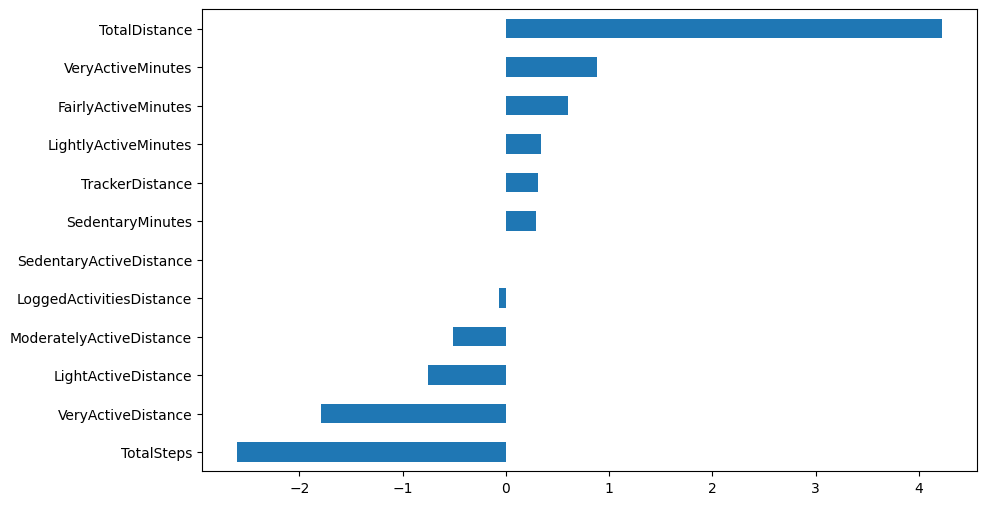

In [206]:
coefs = pd.Series(ridge.coef_, index=X_raw_s.columns)
coefs.sort_values().plot(kind='barh', figsize=(10, 6))
print(coefs.sort_values())

1. We observe that the coefficients for `SedentaryActiveDistance` is extremely small, hence that can be removed.
We can also remove `LoggedActivitiesDistance`